In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=961e56aec50ce3828f186383d5720ced6c021aa1e1e318b55e7d4f947047f9a4
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
# !pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from apyori import apriori
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.size

116295

In [ ]:
df.shape

(38765, 3)

In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
for i in df.columns:
  print(i)

Member_number
Date
itemDescription


In [ ]:
df['Member_number'].unique().size

3898

In [ ]:
df['itemDescription'].unique().size

167

In [ ]:
dates = df['Date'].unique()
dates = list(dates)
dates.sort(key = lambda date: datetime.strptime(date, "%d-%m-%Y"))
dates

['01-01-2014',
 '02-01-2014',
 '03-01-2014',
 '04-01-2014',
 '05-01-2014',
 '06-01-2014',
 '07-01-2014',
 '08-01-2014',
 '09-01-2014',
 '10-01-2014',
 '11-01-2014',
 '12-01-2014',
 '13-01-2014',
 '14-01-2014',
 '15-01-2014',
 '16-01-2014',
 '17-01-2014',
 '18-01-2014',
 '19-01-2014',
 '20-01-2014',
 '21-01-2014',
 '22-01-2014',
 '23-01-2014',
 '24-01-2014',
 '25-01-2014',
 '26-01-2014',
 '27-01-2014',
 '28-01-2014',
 '29-01-2014',
 '30-01-2014',
 '31-01-2014',
 '01-02-2014',
 '02-02-2014',
 '03-02-2014',
 '04-02-2014',
 '05-02-2014',
 '06-02-2014',
 '07-02-2014',
 '08-02-2014',
 '09-02-2014',
 '10-02-2014',
 '11-02-2014',
 '12-02-2014',
 '13-02-2014',
 '14-02-2014',
 '15-02-2014',
 '16-02-2014',
 '17-02-2014',
 '18-02-2014',
 '19-02-2014',
 '20-02-2014',
 '21-02-2014',
 '22-02-2014',
 '23-02-2014',
 '24-02-2014',
 '25-02-2014',
 '26-02-2014',
 '27-02-2014',
 '28-02-2014',
 '01-03-2014',
 '02-03-2014',
 '03-03-2014',
 '04-03-2014',
 '05-03-2014',
 '06-03-2014',
 '07-03-2014',
 '08-03-20

In [ ]:
print(f'Start date: {dates[0]}\nEnd date: {dates[-1]}')

Start date: 01-01-2014
End date: 30-12-2015


In [ ]:
item = df.groupby(['itemDescription']).size()
item = pd.Series.to_frame(item, name = 'No. of items')
item.sort_values(by = "No. of items", inplace = True, ascending = False)
item

,No. of items
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
...,...
rubbing alcohol,5
bags,4
baby cosmetics,3


In [ ]:
items = item.index
items = list(items)
count = item['No. of items']
count = list(count)

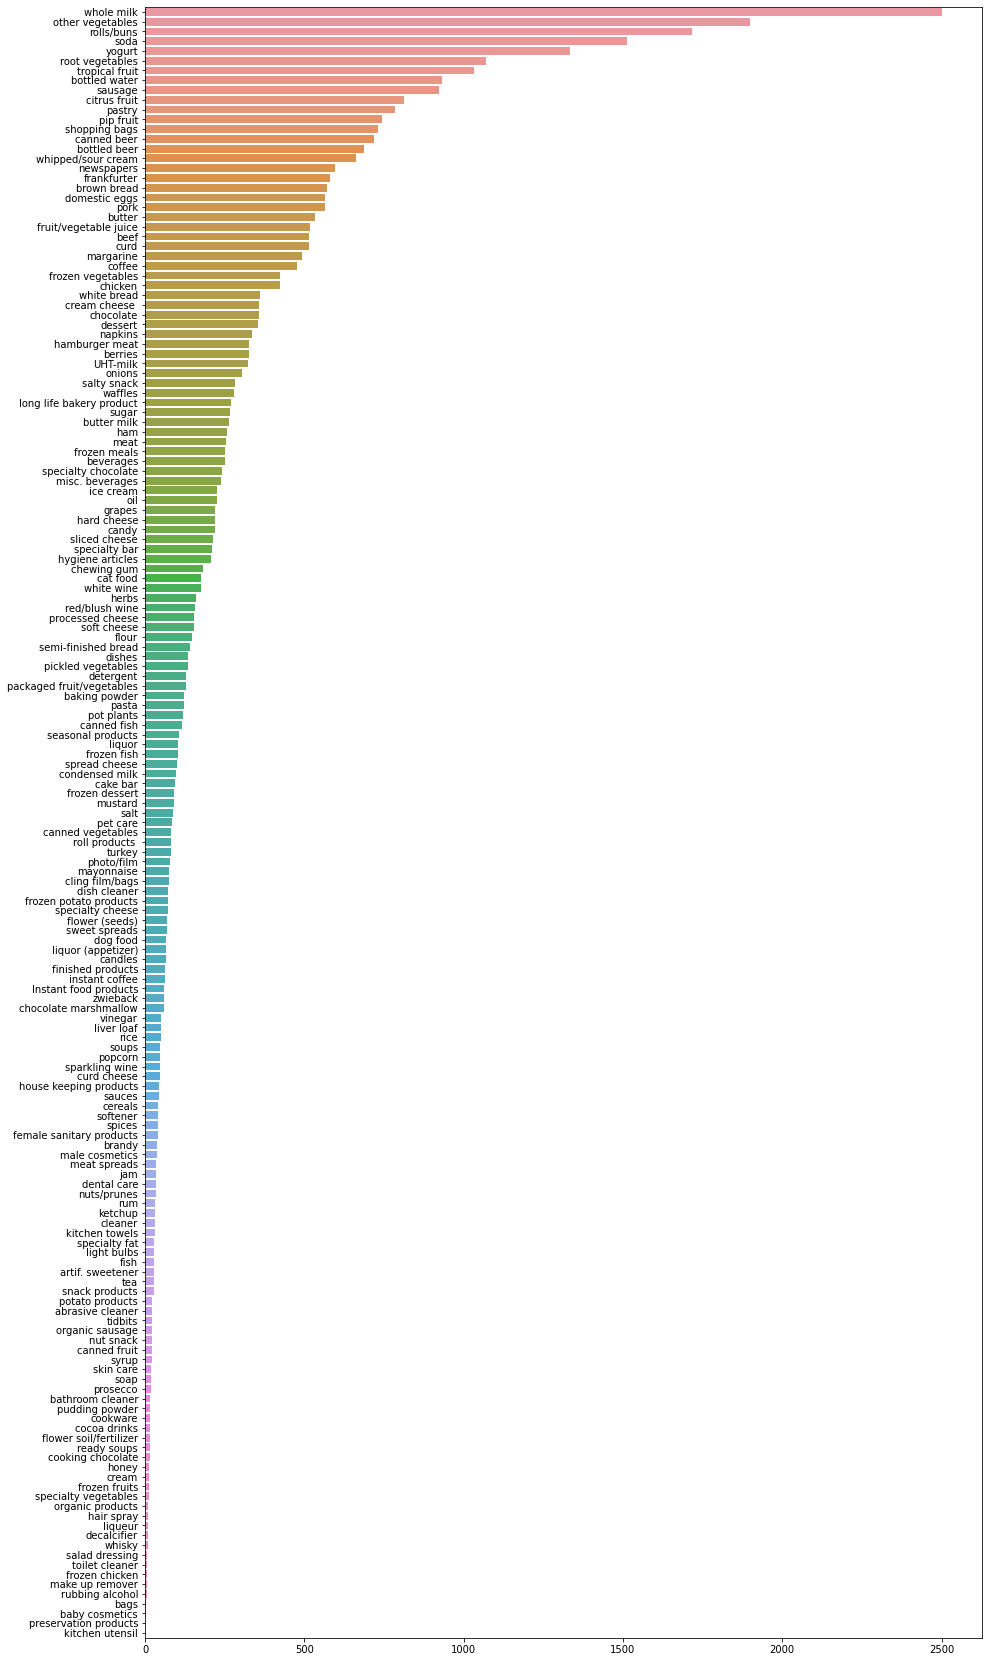

In [ ]:
plt.figure(figsize = (15, 30))
sns.barplot(x = count, y = items)

In [ ]:
df.sort_values(by = 'Member_number', inplace = True)
df

,Member_number,Date,itemDescription
1629,1000,27-05-2015,soda
13331,1000,24-06-2014,whole milk
8395,1000,15-03-2015,whole milk
4843,1000,15-03-2015,sausage
17778,1000,27-05-2015,pickled vegetables
...,...,...,...
34885,5000,10-02-2015,semi-finished bread
25489,5000,16-11-2014,other vegetables
9340,5000,16-11-2014,bottled beer
27877,5000,09-03-2014,onions


In [ ]:
X = df.iloc[:,[0,2]].values
X

array([[1000, 'soda'],
       [1000, 'whole milk'],
       [1000, 'whole milk'],
       ...,
       [5000, 'bottled beer'],
       [5000, 'onions'],
       [5000, 'soda']], dtype=object)

In [ ]:
n = 1000
items = []
transactions = []
for i in range(38765):
    if(X[i, 0] == n):
        items.append(X[i, 1])
        n = X[i, 0]
    else:
        transactions.append(items)
        items = []
        n = X[i, 0]
transactions[0]

['soda',
 'whole milk',
 'whole milk',
 'sausage',
 'pickled vegetables',
 'canned beer',
 'yogurt',
 'misc. beverages',
 'salty snack',
 'sausage',
 'semi-finished bread',
 'hygiene articles',
 'pastry']

# Apriori

In [ ]:
min_sup = float(input('Enter the minimum support: '))
min_con = float(input('Enter the minimum confidence: '))

Enter the minimum support: 0.002
Enter the minimum confidence: 0.2


In [ ]:
rules = apriori(transactions = transactions, min_support = min_sup, min_confidence = min_con, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
result = list(rules)
for i in result:
  print(i)

RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002052861175263023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.32, lift=4.437864768683275)])
RelationRecord(items=frozenset({'rice', 'UHT-milk'}), support=0.0028226841159866563, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rice'}), items_add=frozenset({'UHT-milk'}), confidence=0.2391304347826087, lift=3.3163391613801645)])
RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002052861175263023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4210526315789474, lift=3.8248067721751937)])
RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002052861175263023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4444444444444445, lift=4.2871

In [ ]:
def inspect(result):
  lhs = [tuple(i[2][0][0])[0] for i in result]
  rhs = [tuple(i[2][0][1])[0] for i in result]
  support = [i[1] for i in result]
  confidence = [i[2][0][2] for i in result]
  lift = [i[2][0][3] for i in result]
  return list(zip(lhs, rhs, support, confidence, lift))

In [ ]:
data = pd.DataFrame(inspect(result), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
data.sort_values(by = 'Lift', ascending = False,inplace = True)
data

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002053,0.320000,4.437865
3,canned fruit,coffee,0.002053,0.444444,4.287129
2,potato products,beef,0.002053,0.421053,3.824807
6,sparkling wine,waffles,0.002309,0.219512,3.491588
1,rice,UHT-milk,0.002823,0.239130,3.316339
5,rice,napkins,0.002823,0.239130,3.292902
4,nuts/prunes,coffee,0.002053,0.320000,3.086733


# FP Tree

In [ ]:
fp_data = [
    ['f', 'a', 'c', 'd', 'g', 'i', 'm', 'p'],
    ['a', 'b', 'c', 'f', 'l', 'm', 'o'],
    ['b', 'f', 'h', 'j', 'o', 'w'],
    ['b', 'c', 'k', 's', 'p'],
    ['a', 'f', 'c', 'e', 'l', 'p', 'm', 'n']
]

te = TransactionEncoder()
te_array = te.fit(fp_data).transform(fp_data)
fp_df = pd.DataFrame(te_array, columns=te.columns_)
fp_df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,s,w
0,True,False,True,True,False,True,True,False,True,False,False,False,True,False,False,True,False,False
1,True,True,True,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False
2,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True
3,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
4,True,False,True,False,True,True,False,False,False,False,False,True,True,True,False,True,False,False


In [ ]:
fp_result = fpgrowth(fp_df, min_support = min_sup, use_colnames = True)
fp_result.tail(10)

,support,itemsets
647,0.2,"(a, l, c, p, n, f)"
648,0.2,"(a, c, m, p, n, f)"
649,0.2,"(a, l, m, p, n, e, f)"
650,0.2,"(a, l, c, m, p, n, e)"
651,0.2,"(l, c, m, p, n, e, f)"
652,0.2,"(a, l, c, m, n, e, f)"
653,0.2,"(a, l, c, p, n, e, f)"
654,0.2,"(a, c, m, p, n, e, f)"
655,0.2,"(a, l, c, m, p, n, f)"
656,0.2,"(a, l, c, m, p, n, e, f)"


In [ ]:
rules_fp = association_rules(fp_result, metric="confidence", min_threshold=0.8)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf
1,(a),(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf
2,"(c, a)",(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf
3,"(c, f)",(a),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,"(a, f)",(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf
...,...,...,...,...,...,...,...,...,...
9732,"(n, e)","(a, l, c, m, p, f)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
9733,"(n, f)","(a, l, c, m, p, e)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
9734,"(e, f)","(a, l, c, m, p, n)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
9735,(n),"(a, l, c, m, p, e, f)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
